Summary:  
1. Decision Trees Classification: AUC score - 0.85.     
   Variables :  'Total day charge','Customer service calls','International plan'.  
2. Random Forest Classification : AUC score - 0.91.   
   Variables : 'Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total   eve charge','Customer service calls','International plan'.  

3. Gradient Boosting Classification : AUC score - 0.90.  
   Variables : 'Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total    eve charge','Customer service calls','International plan'.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV


In [3]:
from sklearn.feature_selection import RFE

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import graphviz 
import sklearn.tree as tree

In [7]:
churn_data = pd.read_csv("data_telecom_churn.csv")

In [8]:
def file_details(filename):

    print(filename.head())
    print("\n")
    print(filename.info())
    print("\n")
    print("Null values:")
    print(filename.isnull().sum())

In [9]:
file_details(churn_data)

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [10]:
def perform_classification(model , X_train,X_test,y_train,y_test, classifier):
    
    model = model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)
    

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    if classifier == 'dt':
            print("\n Max depth:{} ".format(model.tree_.max_depth))
        
    
    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Plot Variable importance for decision tree , random forest
    if (classifier == 'dt') | (classifier == 'rf') | (classifier == 'gbm'):
        cols = X_train.columns.tolist()
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)

    

In [11]:
## Hot encode the categorical variables .

def hot_encode(df, cols):
    ## Change the categorical columns to dummy variables . 
    
    for c in cols:
        col_dummies = pd.get_dummies(df[c], prefix_sep = "_", prefix = c)
        df = pd.concat([df,col_dummies] , axis = 1)
        df.drop(c , inplace = True , axis = 1)
    return df

Decision Trees Classifier:  

In [12]:
cols = churn_data.columns.tolist()
print(cols)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']



 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.849587396849
Train Accuracy using predicted labels :0.849587396849
Test set score using predicted labels: 0.81
Calculated Test set score: 0.81
Accuracy score :0.813
Confusion matrix :
[[514  56]
 [ 69  28]]

 Max depth:8 


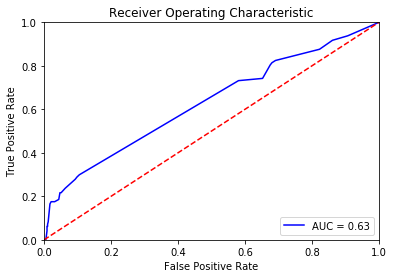

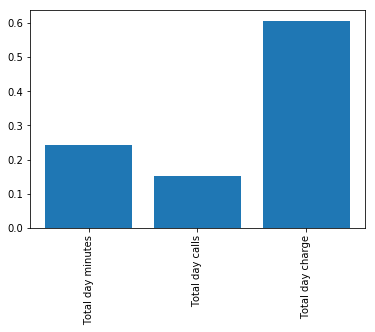

In [19]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[6:9]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced', max_depth = 8)
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.997374343586
Train Accuracy using predicted labels :0.997374343586
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.750
Confusion matrix :
[[486  84]
 [ 83  14]]

 Max depth:37 


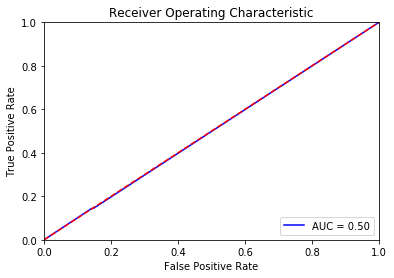

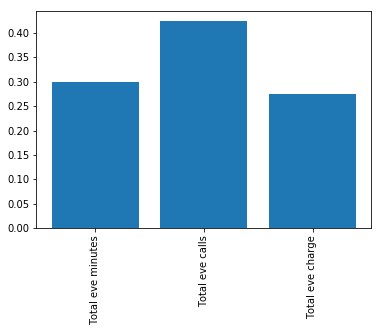

In [26]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[9:12]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced')
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.996249062266
Train Accuracy using predicted labels :0.996249062266
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.745
Confusion matrix :
[[483  87]
 [ 83  14]]

 Max depth:32 


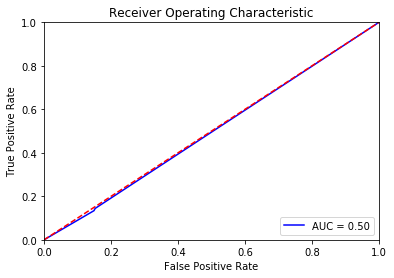

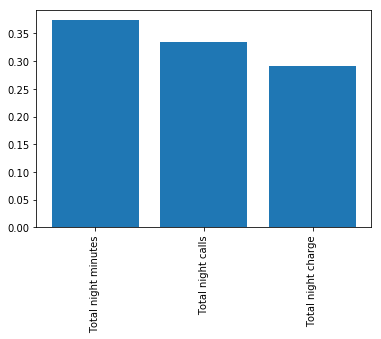

In [30]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[12:15]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced')
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.723930982746
Train Accuracy using predicted labels :0.723930982746
Test set score using predicted labels: 0.72
Calculated Test set score: 0.72
Accuracy score :0.717
Confusion matrix :
[[420 150]
 [ 39  58]]

 Max depth:5 


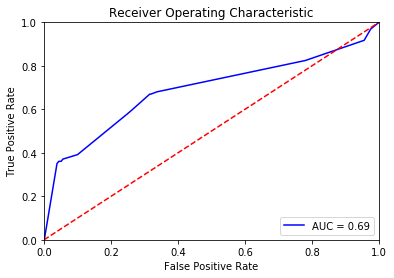

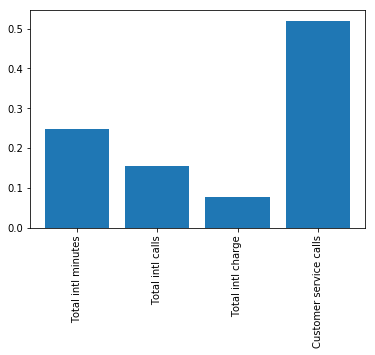

In [43]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[15:19]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced',max_depth = 5)
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.823705926482
Train Accuracy using predicted labels :0.823705926482
Test set score using predicted labels: 0.81
Calculated Test set score: 0.81
Accuracy score :0.808
Confusion matrix :
[[477  93]
 [ 35  62]]

 Max depth:5 


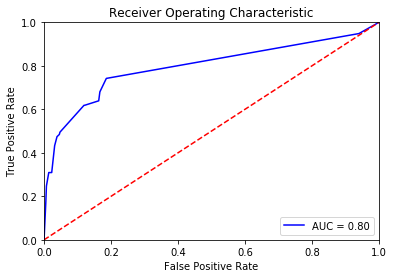

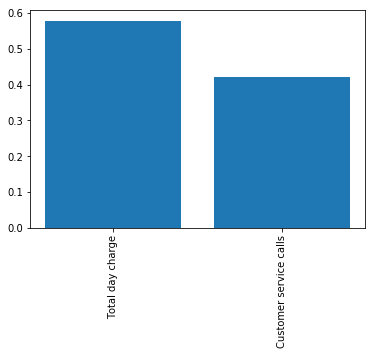

In [13]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[['Total day charge','Customer service calls']], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced',max_depth = 5)
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.841710427607
Train Accuracy using predicted labels :0.841710427607
Test set score using predicted labels: 0.84
Calculated Test set score: 0.84
Accuracy score :0.835
Confusion matrix :
[[532  38]
 [ 72  25]]

 Max depth:1 


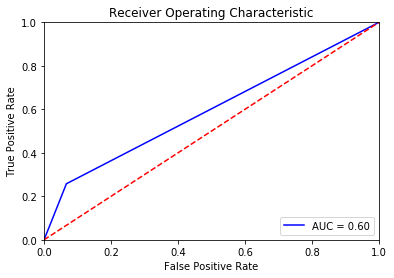

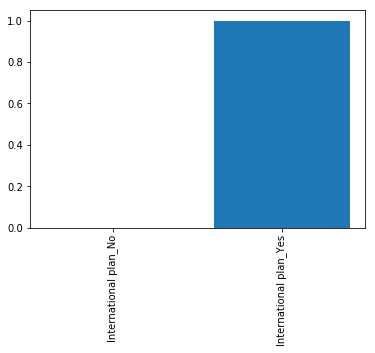

In [18]:
predictors = churn_data[cols[3:4]]
predictors = hot_encode(predictors , cols[3:4])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced')
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.372843210803
Train Accuracy using predicted labels :0.372843210803
Test set score using predicted labels: 0.38
Calculated Test set score: 0.38
Accuracy score :0.376
Confusion matrix :
[[171 399]
 [ 17  80]]

 Max depth:1 


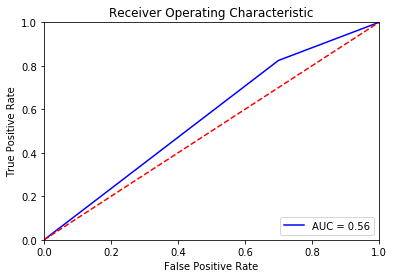

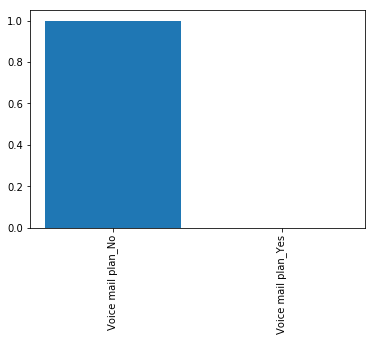

In [19]:
predictors = churn_data[cols[4:5]]
predictors = hot_encode(predictors , cols[4:5])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced')
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.852213053263
Train Accuracy using predicted labels :0.852213053263
Test set score using predicted labels: 0.84
Calculated Test set score: 0.84
Accuracy score :0.837
Confusion matrix :
[[490  80]
 [ 29  68]]

 Max depth:5 


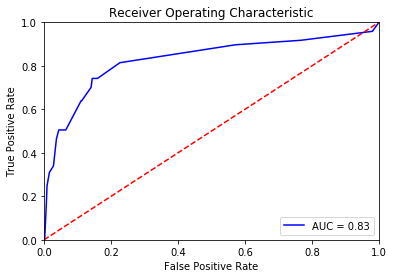

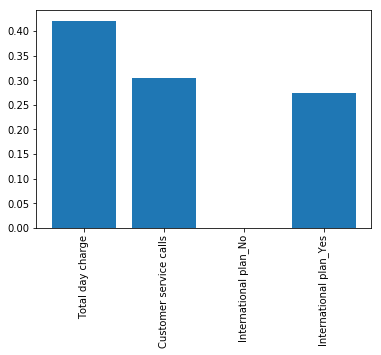

In [20]:
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced',max_depth = 5)
perform_classification(dt , X_train,X_test,y_train,y_test , 'dt' )

Hyper parameter tuning with gridSearchCV.  


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)
{'max_depth': 5, 'min_samples_split': 100}
Test set score using predicted labels: 0.84
Calculated Test set score: 0.84
Accuracy score :0.838
Confusion matrix :
[[491  79]
 [ 29  68]]


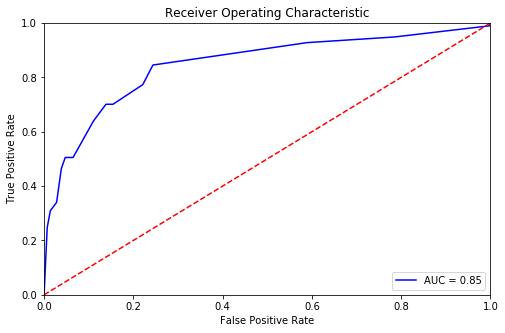

In [27]:
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
## 
param_grid = {
    'max_depth' : [5,8,10,15,20],
    'min_samples_split' : [2,5,10,50,100,150],
    }
dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced')
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
#
print(grid_search.best_params_)
#
dt_best = grid_search.best_estimator_
dt_predictions = dt_best.predict(X_test)
#
print("Test set score using predicted labels: {:.2f}".format(np.mean(dt_predictions == y_test)))

print("Calculated Test set score: {:.2f}".format(dt_best.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,dt_predictions)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,dt_predictions)))
##
## Calculate the AUC and plot the ROC curve.
test_prob = dt_best.predict_proba(X_test)
preds = test_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
    
## Plot ROC curve.
plt.figure(figsize = (8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


RFE for feature selection.  


 X_train : (2666, 18)

 X_test : (667, 18)

 y_train : (2666,)

 y_test : (667,)
Selected Features:

Total day charge
Total eve minutes
Total intl calls
Customer service calls
International plan_No
International plan_Yes
Voice mail plan_No


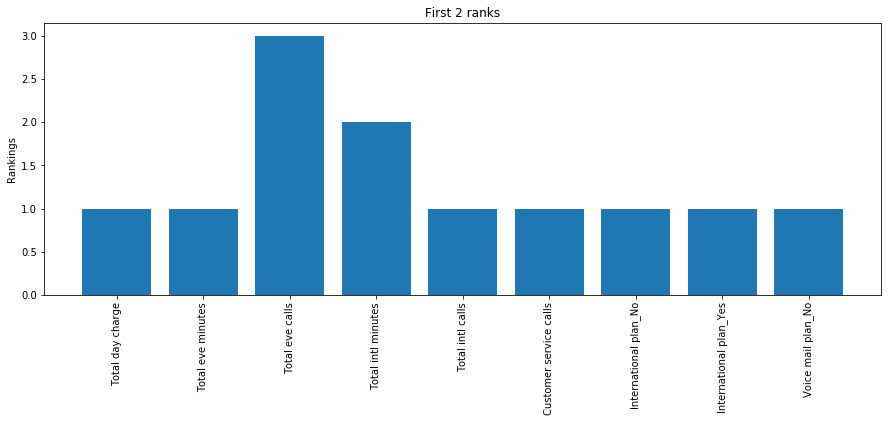

In [28]:
predictors = churn_data[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls','International plan', 'Voice mail plan']]
predictors = hot_encode(predictors , ['International plan', 'Voice mail plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced', max_depth = 5, min_samples_split = 100)
rfe = RFE(dt, 7)
fit = rfe.fit(X_train, y_train)
# report selected features
names = X_train.columns
print('Selected Features:\n')
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
##
# plot feature rank

ticks = [i for i in range(len(names))]
selected_ranking = []
selected_ticks = []
ranking = list(fit.ranking_)
for i in range(len(names)):
    if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
        selected_ranking.append(ranking[i])
        selected_ticks.append(list(names)[i])
        
plt.figure(figsize = (15,5))
plt.bar(selected_ticks, selected_ranking)
plt.xticks(selected_ticks, rotation = 90)
plt.ylabel("Rankings")
plt.title("First 2 ranks")
plt.show()


Cross val score and predict.  

In [31]:
kf = StratifiedKFold(n_splits = 5, shuffle = True)
## Cross Validate with roc_auc as the metric 
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

target = churn_data['Churn']

dt = DecisionTreeClassifier(random_state = 111, class_weight = 'balanced',max_depth = 5, min_samples_split = 100)

scores = cross_val_score(dt, predictors , target, cv = kf, scoring = 'roc_auc' )
predicted = cross_val_predict(dt,predictors , target, cv = kf, method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))

[ 0.8192892   0.86972328  0.84404956  0.86310307  0.79862025]

 Avg AUC score :0.8389570710496173


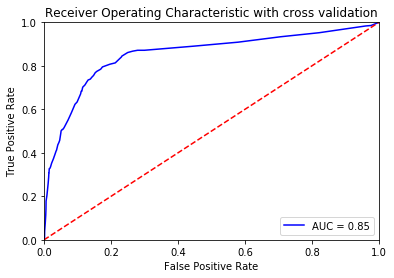

In [32]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(churn_data['Churn'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [33]:
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])

dt.fit(X_train, y_train)
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("churn data tree") 

'churn data tree.pdf'

Random Forest Classifier: 


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.971867966992
Train Accuracy using predicted labels :0.971867966992
Test set score using predicted labels: 0.86
Calculated Test set score: 0.86
Accuracy score :0.858
Confusion matrix :
[[533  37]
 [ 58  39]]


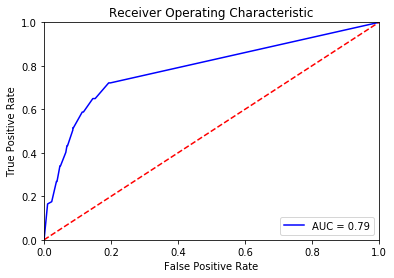

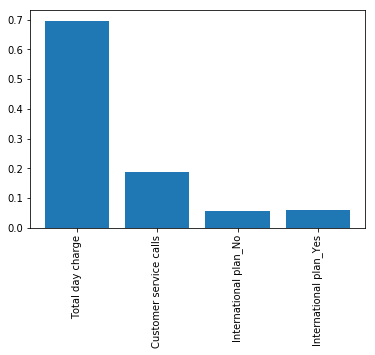

In [34]:
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced')
perform_classification(rf , X_train,X_test,y_train,y_test , 'rf' )

GridSearchCV for Random Forest Classifier.  


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)
{'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 500}
Test set score using predicted labels: 0.84
Calculated Test set score: 0.84
Accuracy score :0.843
Confusion matrix :
[[489  81]
 [ 24  73]]


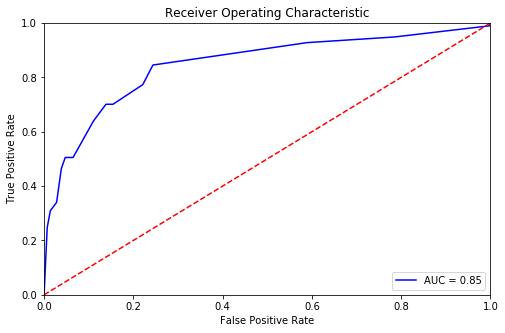

In [36]:
predictors = churn_data[['Total day charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
## 
param_grid = {
    'max_depth' : [5,8,10,15,20],
    'min_samples_split' : [2,5,10,50,100,150],
    'n_estimators' : [100,200,500]
    }
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
#
print("\n Best parameters :")
print(grid_search.best_params_)
#
rf_best = grid_search.best_estimator_
rf_predictions = rf_best.predict(X_test)
#
print("Test set score using predicted labels: {:.2f}".format(np.mean(rf_predictions == y_test)))

print("Calculated Test set score: {:.2f}".format(rf_best.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,rf_predictions)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,rf_predictions)))
##
## Calculate the AUC and plot the ROC curve.
test_prob = rf_best.predict_proba(X_test)
preds = test_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
    
## Plot ROC curve.
plt.figure(figsize = (8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Using RFE with Random Forest Classifier.  


 X_train : (2666, 18)

 X_test : (667, 18)

 y_train : (2666,)

 y_test : (667,)
Selected Features:

Total day minutes
Total day charge
Total eve minutes
Total eve charge
Customer service calls
International plan_No
International plan_Yes


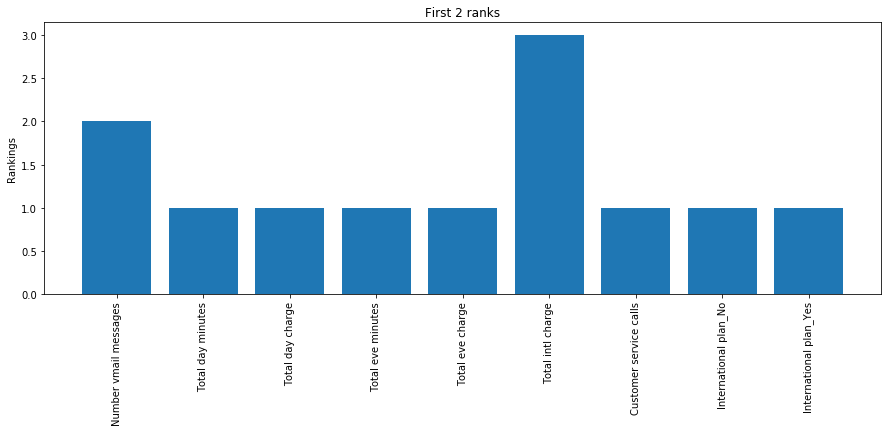

In [37]:
predictors = churn_data[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls','International plan', 'Voice mail plan']]
predictors = hot_encode(predictors , ['International plan', 'Voice mail plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced', max_depth = 8, min_samples_split = 50, n_estimators = 500)
rfe = RFE(rf, 7)
fit = rfe.fit(X_train, y_train)
# report selected features
names = X_train.columns
print('Selected Features:\n')
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
##
# plot feature rank

ticks = [i for i in range(len(names))]
selected_ranking = []
selected_ticks = []
ranking = list(fit.ranking_)
for i in range(len(names)):
    if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
        selected_ranking.append(ranking[i])
        selected_ticks.append(list(names)[i])
        
plt.figure(figsize = (15,5))
plt.bar(selected_ticks, selected_ranking)
plt.xticks(selected_ticks, rotation = 90)
plt.ylabel("Rankings")
plt.title("First 2 ranks")
plt.show()



 X_train : (2666, 7)

 X_test : (667, 7)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.880720180045
Train Accuracy using predicted labels :0.880720180045
Test set score using predicted labels: 0.88
Calculated Test set score: 0.88
Accuracy score :0.877
Confusion matrix :
[[504  66]
 [ 16  81]]


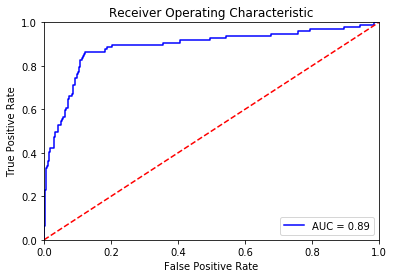

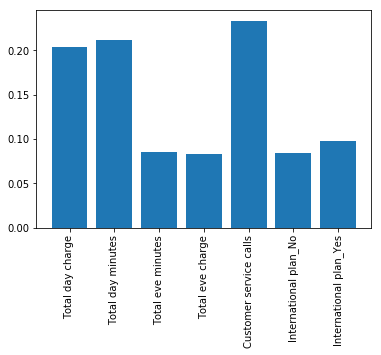

In [38]:
predictors = churn_data[['Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced', max_depth = 8, min_samples_split = 50 , n_estimators = 500)
perform_classification(rf , X_train,X_test,y_train,y_test , 'rf' )


 X_train : (2666, 9)

 X_test : (667, 9)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.911102775694
Train Accuracy using predicted labels :0.911102775694
Test set score using predicted labels: 0.89
Calculated Test set score: 0.89
Accuracy score :0.888
Confusion matrix :
[[511  59]
 [ 16  81]]


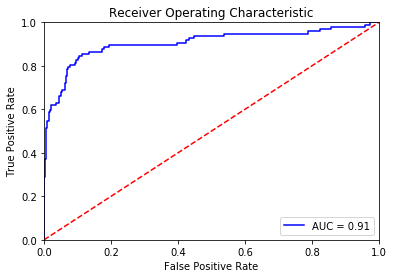

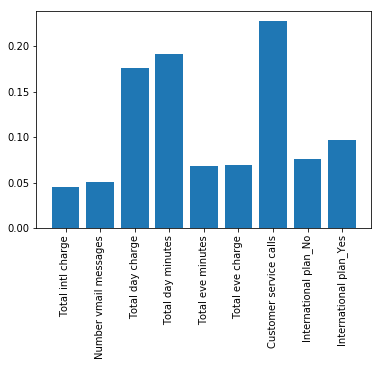

In [39]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced', max_depth = 8, min_samples_split = 50 , n_estimators = 500)
perform_classification(rf , X_train,X_test,y_train,y_test , 'rf' )

Cross validation.  

In [40]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])
##
target = churn_data['Churn']
kf = StratifiedKFold(n_splits = 5, shuffle = True)
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced', max_depth = 8, min_samples_split = 50 , n_estimators = 500)

scores = cross_val_score(rf, predictors , target, cv = kf, scoring = 'roc_auc' )
predicted = cross_val_predict(rf,predictors , target, cv = kf, method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))


[ 0.88949177  0.90459396  0.89102912  0.89358553  0.90756579]

 Avg AUC score :0.8972532329535177


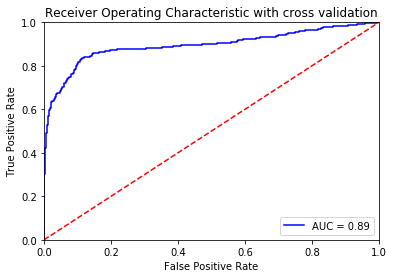

In [41]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(churn_data['Churn'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



 X_train : (2666, 9)

 X_test : (667, 9)

 y_train : (2666,)

 y_test : (667,)

 Best parameters :
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Test set score using predicted labels: 0.91
Calculated Test set score: 0.91
Accuracy score :0.912
Confusion matrix :
[[541  29]
 [ 30  67]]


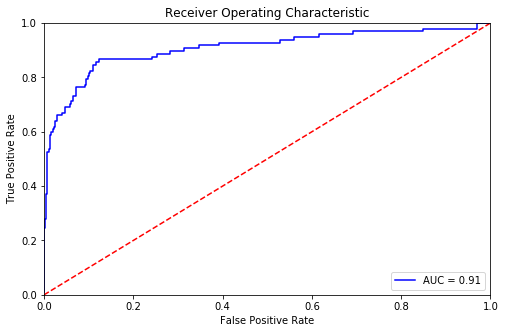

In [43]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
## 
param_grid = {
    'max_depth' : [5,8,10,15,20],
    'min_samples_split' : [2,5,10,50,100,150],
    'n_estimators' : [100,200,500]
    }
rf = RandomForestClassifier(random_state = 111, class_weight = 'balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
#
print("\n Best parameters :")
print(grid_search.best_params_)
#
rf_best = grid_search.best_estimator_
rf_predictions = rf_best.predict(X_test)
#
print("Test set score using predicted labels: {:.2f}".format(np.mean(rf_predictions == y_test)))

print("Calculated Test set score: {:.2f}".format(rf_best.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,rf_predictions)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,rf_predictions)))
##
## Calculate the AUC and plot the ROC curve.
test_prob = rf_best.predict_proba(X_test)
preds = test_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
    
## Plot ROC curve.
plt.figure(figsize = (8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Gradient Boosting Classifier:  


 X_train : (2666, 9)

 X_test : (667, 9)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.958739684921
Train Accuracy using predicted labels :0.958739684921
Test set score using predicted labels: 0.93
Calculated Test set score: 0.93
Accuracy score :0.925
Confusion matrix :
[[562   8]
 [ 42  55]]


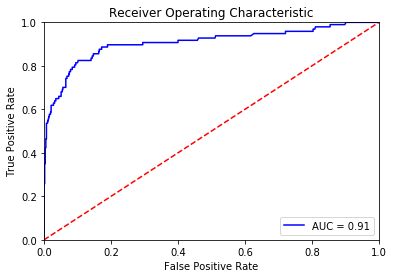

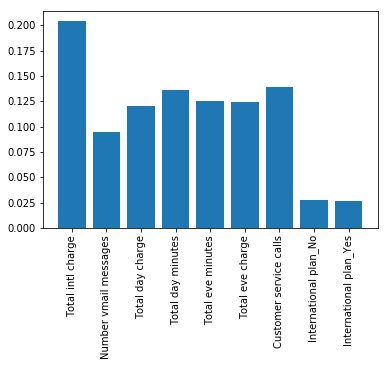

In [44]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
gbm = GradientBoostingClassifier(random_state = 111)
perform_classification(gbm , X_train,X_test,y_train,y_test , 'gbm' )

RFE with Gradient Boosting Classifier:  


 X_train : (2666, 18)

 X_test : (667, 18)

 y_train : (2666,)

 y_test : (667,)
Selected Features:

Number vmail messages
Total day minutes
Total day charge
Total eve charge
Total night minutes
Total intl minutes
Customer service calls


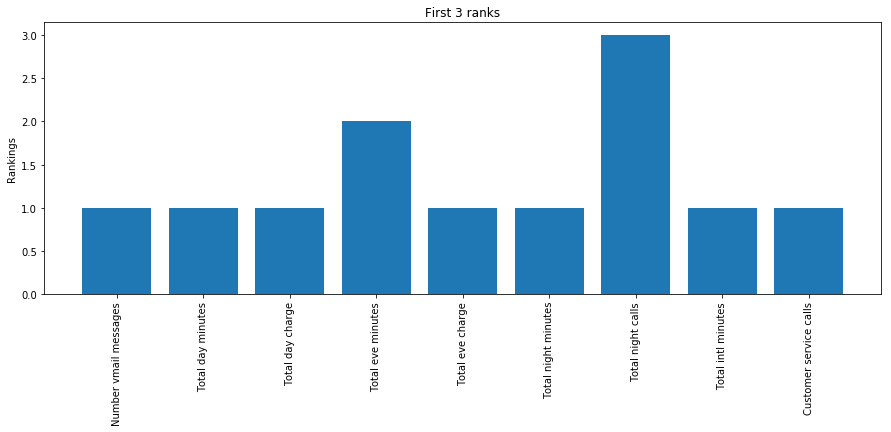

In [45]:
predictors = churn_data[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls','International plan', 'Voice mail plan']]
predictors = hot_encode(predictors , ['International plan', 'Voice mail plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


gbm = GradientBoostingClassifier(random_state = 111)
rfe = RFE(gbm, 7)
fit = rfe.fit(X_train, y_train)
# report selected features
names = X_train.columns
print('Selected Features:\n')
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
##
# plot feature rank

ticks = [i for i in range(len(names))]
selected_ranking = []
selected_ticks = []
ranking = list(fit.ranking_)
for i in range(len(names)):
    if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
        selected_ranking.append(ranking[i])
        selected_ticks.append(list(names)[i])
        
plt.figure(figsize = (15,5))
plt.bar(selected_ticks, selected_ranking)
plt.xticks(selected_ticks, rotation = 90)
plt.ylabel("Rankings")
plt.title("First 3 ranks")
plt.show()


GridSearchCV for hyper parameter tuning.  


 X_train : (2666, 9)

 X_test : (667, 9)

 y_train : (2666,)

 y_test : (667,)

 Best parameters :
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Test set score using predicted labels: 0.92
Calculated Test set score: 0.92
Accuracy score :0.924
Confusion matrix :
[[561   9]
 [ 42  55]]


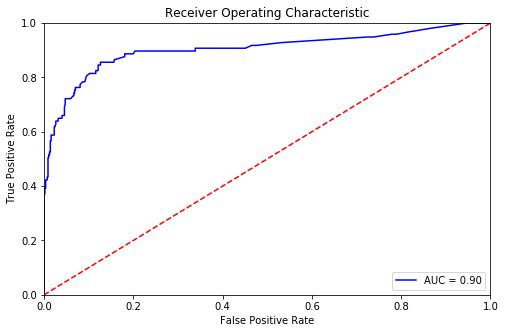

In [48]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
## 
param_grid = {
    'max_depth' : [2,3],
    'learning_rate' : [0.01,0.1,1],
    'n_estimators' : [100,500,900]
    }
gbm = GradientBoostingClassifier(random_state = 111)
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
#
print("\n Best parameters :")
print(grid_search.best_params_)
#
gbm_best = grid_search.best_estimator_
gbm_predictions = gbm_best.predict(X_test)
#
print("Test set score using predicted labels: {:.2f}".format(np.mean(gbm_predictions == y_test)))

print("Calculated Test set score: {:.2f}".format(gbm_best.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,gbm_predictions)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,gbm_predictions)))
##
## Calculate the AUC and plot the ROC curve.
test_prob = gbm_best.predict_proba(X_test)
preds = test_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
    
## Plot ROC curve.
plt.figure(figsize = (8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Cross Validate:  

In [50]:
predictors = churn_data[['Total intl charge', 'Number vmail messages', 'Total day charge','Total day minutes','Total eve minutes', 'Total eve charge','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])
target = churn_data['Churn']
kf = StratifiedKFold(n_splits = 5, shuffle = True)
gbm = GradientBoostingClassifier(random_state = 111, learning_rate =0.01 , n_estimators = 500)
scores = cross_val_score(gbm, predictors , target, cv = kf, scoring = 'roc_auc' )
predicted = cross_val_predict(gbm,predictors , target, cv = kf, method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))



[ 0.89335323  0.91135829  0.93028577  0.9130117   0.88785636]

 Avg AUC score :0.9071730685175137


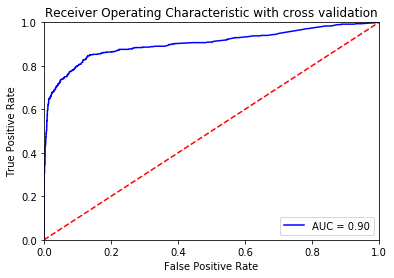

In [51]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(churn_data['Churn'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
